# Test 2D Levy flight in a switching fitness landscape
<!-- ## The flights in each dimension are dependent -->

Potential interpolated from grid data, `./input/landscape1.csv` and `./input/landscape2.csv`
Grid data for potential taken from `/home/ochab/Dropbox/backup/ecoli/maple/fitness_new03a.mw`

# Uwaga!
Wykomentowane

<!-- Levy Flight jako proces symulujący spacer po krajobrazie dostosowania jest trudny matematycznie, bo:

1. Powoduje problemy numeryczne na brzegach: Gdy x lub y jest blisko 0, to przy używanym tutaj potencjale (-funkcja fitness) włącza się adaptacyjny bardzo mały krok czasowy i symulacja się zawiesza. Można ustalić sztuczne ograniczenie na krok czasowy, ale to oznacza, że numerycznie symulacja już nie produkuje ścisłego matematycznie lotu Levy'ego.

Inne problemy:

2. Potrzeba zdefiniować warunki brzegowe w x,y=0. 
    1. Wcześniej zdefiniowałam pozostawanie w poprzednim punkcie. 
    2. Teraz zdefiniowałam losowanie do skutku. 
    Jest to tak czy inaczej arbitralne.
3. Potrzeba zdefiniować warunki brzegowe w sytuacji, gdy fitness < 0
4. Nawet przy takich sztucznych ustawieniach, histogramy z wielu symulacji pokazują, że trajektorie pałętają się głównie przy brzegach x=0, y=0. Dlaczego? Przecież fitness ma globalne maksimum gdzie indziej. 
    1. Wygląda na to, że zależy to od warunków początkowych.
    2. Reprezentatywne próbkowanie całej przestrzeni jest niemożliwe, zajmie za dużo czasu obliczeniowego.
5. Trzeba by odrzucać możliwość ewolucji w dół fitness.
6. Zrobić nową gałąź do tej symulacji. -->

## Definitions

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import random
import time
from run import run

In [2]:
def generate_ax_traj(ax:plt.axes, trajdf:pd.DataFrame) -> None:    
    """Generate plt.axes object that plots a trajectory saved in trajdf.

    Args:
        ax (plt.axes): Plot content
        trajdf (pd.DataFrame): Trajectory data frame with columns: 'x' and 'y'
    """    
    if trajdf is not None:
            ax.plot(trajdf.x,trajdf.y, color='black')
    return


def generate_ax_pcolormesh(
        fig:plt.figure, 
        ax:plt.axes, 
        axtitle:str, 
        df:pd.DataFrame, 
        z_column:str, 
        fmin:float, 
        fmax:float
        )-> None:
    """Generate plt.axes object that plots a colormesh.

    Args:
        fig (plt.figure): Figure (needed for colorbar() (???))
        ax (plt.axes): Plot content
        axtitle (str): Plot title
        df (pd.DataFrame): Dataframe with columns: x='kmr', y='kr', z=z_column
        z_column (str): z column title
        fmin (float): Minimal z value of the color mesh
        fmax (float): Maximal z value of the color mesh
    """        
    nx = int( df['kmr'].max() - df['kmr'].min() + 1)
    ny = int( df['kr'].max() - df['kr'].min() + 1)

    x = df['kmr'].values.reshape(nx,ny).T
    y = df['kr'].values.reshape(nx,ny).T
    z = df[z_column].values.reshape(nx,ny).T

    c = ax.pcolormesh(x,y,z,vmin=fmin, vmax=fmax, cmap = plt.cm.jet)

    ax.set_title(axtitle)
    ax.set_xlabel('kmr')
    ax.set_ylabel('kr')
    fig.colorbar(c , ax=ax) 
    return

def plot_figures(
        dflist:list, 
        z_column:str, 
        fmin:list=[], 
        fmax:list=[],
        trajdf:pd.DataFrame=None
        )-> None:
    """Plot any number of figures side by side.

    Args:
        dflist (list): List of dataframes containing the color mesh data
        z_column (str): z column title for the dataframes containing the color mesh data
        fmin (list, optional): Minimal z value of the color mesh. Defaults to [].
        fmax (list, optional): Maximal z value of the color mesh. Defaults to [].
        trajdf (pd.DataFrame, optional): Trajectory data frame with columns: 'x' and 'y'. Defaults to None.
    """    
    fig, ax = plt.subplots(1,len(dflist),  figsize=(4.5*len(dflist), 3))

    for i in range (len(dflist)):
        if len(dflist)==1:
            Ax=ax
            title = z_column
        else:  
            Ax = ax[i]
            title = z_column+str(i)

        if len(fmin)>0:
            v_min=fmin[i]
        else:
            v_min=None
        if len(fmax)>0:
            v_max=fmax[i]
        else:
            v_max=None    

        generate_ax_traj(ax=Ax, trajdf=trajdf)
    
        generate_ax_pcolormesh(
            fig=fig, 
            ax=Ax, 
            axtitle=title, 
            df=dflist[i], 
            z_column=z_column, 
            fmin=v_min, 
            fmax=v_max
            )

    plt.show()
    return

In [3]:
input_dir="./input/"
input_data_file1 = "landscape1.csv"
input_data_file2 = "landscape2.csv"
input_data_files=[input_data_file1,input_data_file2]
potentialfile1 = input_dir+input_data_file1
potentialfile2 = input_dir+input_data_file2
output_dir="./output/"
output_log_file="out.log"

In [4]:
Ndatafiles=2
dfv=[]
for i in range (Ndatafiles):
    dfv.append(pd.read_csv(input_dir+input_data_files[i]))

In [5]:
display(dfv[0])
display(dfv[1])

,kmr,kr,fitness
0,1.0,1.0,-574.1
1,1.0,2.0,-573.2
2,1.0,3.0,-572.3
3,1.0,4.0,-571.4
4,1.0,5.0,-570.5
...,...,...,...
9995,100.0,96.0,6202.0
9996,100.0,97.0,6292.0
9997,100.0,98.0,6382.0
9998,100.0,99.0,6472.0


,kmr,kr,fitness
0,1.0,1.0,-23575.0
1,1.0,2.0,-23575.0
2,1.0,3.0,-23575.0
3,1.0,4.0,-23575.0
4,1.0,5.0,-23575.0
...,...,...,...
9995,100.0,96.0,-22822.0
9996,100.0,97.0,-22812.0
9997,100.0,98.0,-22802.0
9998,100.0,99.0,-22792.0


Until now, we have had the potential landscape (optimum=minimum): `dfv`

For plotting, we prefer the data as a fitness landscape (optimum=maximum): `dff`

## Convert potential landscape to fitness landscape

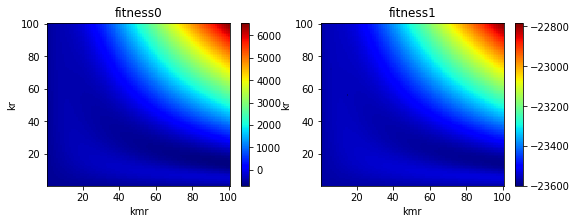

In [6]:
plot_figures(dfv, z_column='fitness')

These are potential landscapes. Max fitness = min potential.

We create `dff`: fitness landscape = -potential:

In [7]:
# Real copy
dff=[df.copy(deep=True) for df in dfv]
for df in dff:
    df['fitness']=-df['fitness']

The differences between the landscapes are unnoticeable. We check this below.

## Check how much the landscapes differ between each other, apart from the difference by a constant.

### Subtract the landscapes

If the landscapes differ by a constant only, the difference will be constant.

In [8]:
dfdiff = pd.DataFrame()
dfdiff=dfv[i][['kmr','kr']]
dfdiff['fitness0'] = dfv[0][['fitness']]
dfdiff['fitness1'] = dfv[1][['fitness']]
dfdiff['fitness difference'] = dfv[1]['fitness']-dfv[0]['fitness']
display(dfdiff)

,kmr,kr,fitness0,fitness1,fitness difference
0,1.0,1.0,-574.1,-23575.0,-23000.9
1,1.0,2.0,-573.2,-23575.0,-23001.8
2,1.0,3.0,-572.3,-23575.0,-23002.7
3,1.0,4.0,-571.4,-23575.0,-23003.6
4,1.0,5.0,-570.5,-23575.0,-23004.5
...,...,...,...,...,...
9995,100.0,96.0,6202.0,-22822.0,-29024.0
9996,100.0,97.0,6292.0,-22812.0,-29104.0
9997,100.0,98.0,6382.0,-22802.0,-29184.0
9998,100.0,99.0,6472.0,-22792.0,-29264.0


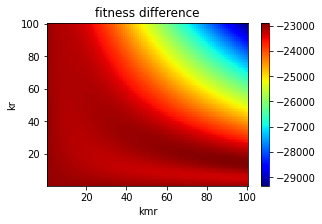

In [9]:
plot_figures([dfdiff], z_column='fitness difference')

Above, we can see the differences between the landscapes. We visualize this below.

### Plot both landscapes next to each other with min values fixed

#### Minimal Z coordinate (color) fixed on plots: Attempt 4 

(See [`LevyFlight09.ipynb`](LevyFlight09.ipynb) for previous attempts)

Minimal values: $fitness(1,1) + (fitness_{max}-fitness_{min})/15$.

Maximal values: $fitness(1,1) + const.$

const.=700

In [10]:
f=[dff[i]['fitness'].iloc[0] -(dff[i]['fitness'].max()-dff[i]['fitness'].min())/15 \
   for i in range(Ndatafiles)]

fmin=np.array(f)

fmax=fmin+700

display(fmin, fmax)

array([   89.17      , 23520.46666667])

array([  789.17      , 24220.46666667])

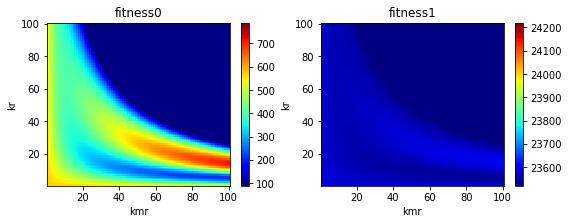

In [11]:
plot_figures(dflist=dff,  z_column='fitness',fmin=fmin, fmax=fmax)

### Summary

We can see that both landscapes are similar but landscape 1 is flatter than landscape 0.

## Run simulation

In [12]:
T1=1000.0
Ntraj1=1
dt1= 0.1 #0.001
minDt = 0. #1e-1
eta=0.1
D = 2. #1. #0.1
gamma = 1. #0.5
# alpha= # Will be given below
x0=5.
y0=5.
kr1=10.
kr2=20.
kmr1=90.
kmr2=100.

In [13]:
def test_alpha_param(alpha:float)->None:
   """Test simulation trajectories with a chosen value of the Levy flight parameter alpha.
   The function generates plots of the trajectory vs. time and the trajectory on the background of 
   two fitness landscapes (landscape 0 and landscape 1 switched in time during the simulation).

   Args:
       alpha (float): Levy flight parameter
   """

   output_data_file=f"outT{T1:.0e}N{Ntraj1:.0e}dt{dt1:.0e}_single_traj.csv"
   random.seed(time.time())
   run(
      output_dir,
      output_data_file,
      output_log_file,
      alpha=alpha, 
      D=D,
      gamma = gamma,
      dt=dt1, 
      minDt=minDt,
      eta=eta,
      T=T1, 
      t0=0., 
      x0=x0,
      y0=y0,
      kmr1=kmr1,
      kmr2=kmr2,
      kr1=kr1,
      kr2=kr2,
      Ntraj=Ntraj1,
      seed = random.randrange(100000), #785130160,
      potentialfile=potentialfile1,
      potentialfile_second=potentialfile2
      )



   print(open('./output/out.log', 'r').read()) 


   df=pd.read_csv(output_dir+output_data_file)

   fig, ax = plt.subplots(1,1)
   ax.plot(df.t, df.x , label=f"kmr, dt={dt1}")
   ax.plot(df.t, df.y , label=f"kr, dt={dt1}")
   ax.legend(loc='best', frameon=False)
   ax.set_xlabel("t")
   ax.set_ylabel("kmr, kr")
   f=[dff[i]['fitness'].iloc[0] -(dff[i]['fitness'].max()-dff[i]['fitness'].min())/15 \
      for i in range(Ndatafiles)]

   fmin=np.array(f)

   fmax=fmin+700
   plt.show()


   f=[dff[i]['fitness'].iloc[0] -(dff[i]['fitness'].max()-dff[i]['fitness'].min())/15 \
      for i in range(Ndatafiles)]

   fmin=np.array(f)

   fmax=fmin+700

   plot_figures(dflist=dff, z_column='fitness',fmin=fmin, fmax=fmax, trajdf=df)
   return

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 30516
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input/landscape1.csv
potential_file_second=./input/landscape2.csv
Average time of simulation: 52.9728
Time simulation variance: 1977.21
Output written to STDOUT.
Done.

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 32143
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input

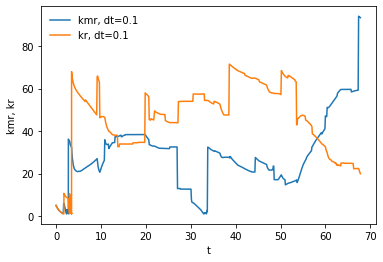

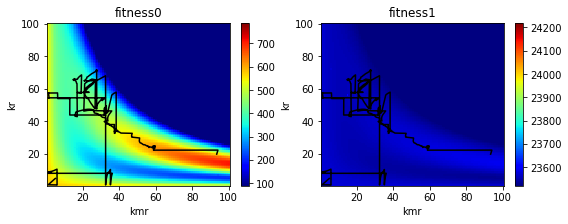

In [14]:
test_alpha_param(alpha=0.1)

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 30516
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input/landscape1.csv
potential_file_second=./input/landscape2.csv
Average time of simulation: 52.9728
Time simulation variance: 1977.21
Output written to STDOUT.
Done.

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 32143
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input

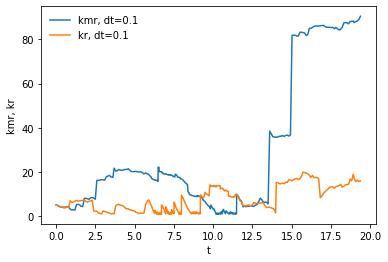

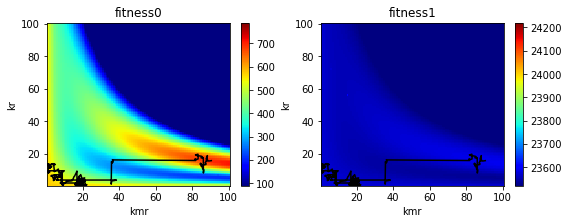

In [15]:
test_alpha_param(alpha=1.0)

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 30516
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input/landscape1.csv
potential_file_second=./input/landscape2.csv
Average time of simulation: 52.9728
Time simulation variance: 1977.21
Output written to STDOUT.
Done.

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 32143
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input

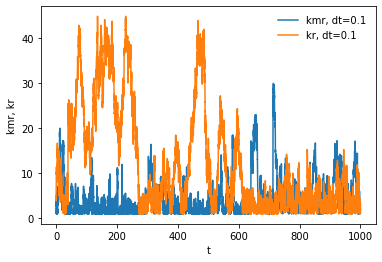

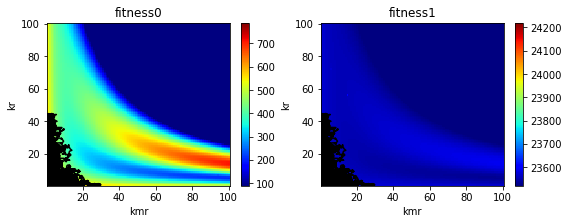

In [16]:
test_alpha_param(alpha=1.9)

## Generate an ensemble of trajectories, plot heatmap of points reached at a given time

In [17]:
def run_ensemble_simulation(alpha:float, T:float, Ntraj:int)->str:
    """Run ensemble simulation with a chosen value of the Levy flight parameter alpha.  
    The simulation switches landscape 0 and landscape 1 in time.
    The function generates a file with columns: t,x,y. t: simulation end (here: when
    the trajectory reaches the square ((kmr1,kmr2),(kr1,kr2))). x,y: coordinates of the
    last point of the trajectory.

    Args:
        alpha (float): Levy flight parameter
        T (float): max simulation time
        Ntraj (int) : number of trajectories in the ensemble
    Returns:
        output_data_file (str):
    """   
    output_data_file=f"outT{T1:.0e}N{Ntraj1:.0e}dt{dt1:.0e}alpha{alpha:.0e}_ensemble.csv"
    random.seed(time.time())
    
    run(
        output_dir,
        output_data_file,
        output_log_file,
        alpha=alpha, 
        D=D,
        gamma = gamma,
        dt=dt1, 
        minDt=minDt,
        eta=eta,
        T=T, 
        t0=0., 
        x0=x0,
        y0=y0,
        kmr1=kmr1,
        kmr2=kmr2,
        kr1=kr1,
        kr2=kr2,
        Ntraj=Ntraj,
        seed = random.randrange(100000),# 785130169,
        potentialfile=potentialfile1,
        potentialfile_second=potentialfile2
    )

    print(open('./output/out.log', 'r').read()) 
    return output_data_file


def plot_heatmap(output_data_file:str, alpha:float)->None:
    """Plot heatmap from the output data file columns x,y.

    Args:
        output_data_file (str):
        alpha (float): alpha parameter
    """    
    ensdf=pd.read_csv(output_dir+output_data_file)
    fig, ax = plt.subplots(1,1)
    Nbins = 100
    x_bins = np.linspace(0, 100, Nbins)
    y_bins = np.linspace(0, 100, Nbins)
    h = ax.hist2d(np.array(ensdf.x), np.array(ensdf.y), bins =[x_bins, y_bins], cmap = plt.cm.jet) 
    # nipy_spectral
    fig.colorbar(h[3] , ax=ax) 
    ax.set_xlabel('kmr')
    ax.set_ylabel('kr')
    ax.set_title("alpha={:.1f}".format(alpha))

    plt.tight_layout() 
    plt.show()
    return

def plot_fpt_hist(output_data_file:str, alpha:float)->tuple:
    """Plot a histogram from the output_data_file's 't' column.

    Args:
        output_data_file (str):
        alpha (float): alpha parameter

    Returns:
        (float, float): ('t' column mean, 't' column std dev)
    """    
    ensdf=pd.read_csv(output_dir+output_data_file)
    fig,ax=plt.subplots(1,1)
    plt.hist(ensdf['t'], bins=30, density=True)

    x_label = 'Time to reach the maximum region (({:.0f},{:.0f}),({:.0f},{:.0f})), T'.format(kmr1,kmr2,kr1,kr2)

    ax.set_xlabel(x_label) 
    ax.set_ylabel('Probability')  
    ax.set_title("alpha={:.1f}".format(alpha))  
    plt.show()     
    return


def get_fpt_mean_sd(output_data_file:str)->tuple:
    """Get 't' column mean, 't' column std dev from the file
    Args:
        output_data_file (str):

    Returns:
        (float, float): ('t' column mean, 't' column std dev)
    """       
    ensdf=pd.read_csv(output_dir+output_data_file)
    return(ensdf['t'].mean(), ensdf['t'].std())              


In [18]:
alpha=0.1
T=10.
Ntraj=1000

output_data_file=run_ensemble_simulation(alpha=alpha, T=T, Ntraj=Ntraj);
mean_fpt, sd_fpt=get_fpt_mean_sd(output_data_file=output_data_file)
print('mean_fpt={}, sd_fpt={}'.format(mean_fpt,sd_fpt))

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 30516
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input/landscape1.csv
potential_file_second=./input/landscape2.csv
Average time of simulation: 52.9728
Time simulation variance: 1977.21
Output written to STDOUT.
Done.

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 32143
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input

The simulation returns mean FPT and variance of FPT.

Additionally, I do the same reading from the output file: mean, std dev.

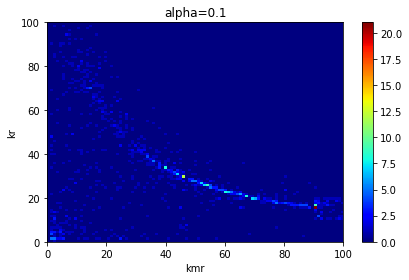

In [19]:
plot_heatmap(output_data_file=output_data_file, alpha=alpha)

Trajectories are supposed to stop at the square ((10,20),(90,100)).
The square is brighter here because a part of the trajectories reached it and then the simulation was stopped. However, other trajectories did not make it to reach the square, hence the rest of the heat map.

## Generate ensemble of trajectories

###  First passage time histogram for a single set of simulation parameters

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 30516
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input/landscape1.csv
potential_file_second=./input/landscape2.csv
Average time of simulation: 52.9728
Time simulation variance: 1977.21
Output written to STDOUT.
Done.

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 32143
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input

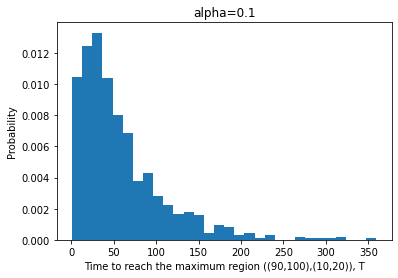

outT1e+03N1e+00dt1e-01alpha1e-01_ensemble.csv


In [20]:
alpha=0.1
T=5000.
Ntraj=1000

output_data_file=run_ensemble_simulation(alpha=alpha, T=T, Ntraj=Ntraj)

plot_fpt_hist(output_data_file=output_data_file, alpha=alpha)

print(output_data_file)